In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
car = pd.read_csv('cars-dataset.csv')

In [186]:
car.sample(10)

,car name,cyl,disp,hp,wt,acc,yr,mpg
19,volkswagen 1131 deluxe sedan,4,97.0,46,1835,20.5,70,26.0
191,plymouth valiant,6,225.0,100,3233,15.4,76,22.0
77,volkswagen 411 (sw),4,121.0,76,2511,18.0,72,22.0
328,mercedes-benz 240d,4,146.0,67,3250,21.8,80,30.0
90,mercury marquis brougham,8,429.0,198,4952,11.5,73,12.0
144,toyota corona,4,76.0,52,1649,16.5,74,31.0
122,saab 99le,4,121.0,110,2660,14.0,73,24.0
169,amc gremlin,6,232.0,100,2914,16.0,75,20.0
76,volvo 145e (sw),4,121.0,112,2933,14.5,72,18.0
238,dodge colt m/m,4,98.0,83,2075,15.9,77,33.5


In [187]:
car.shape

(398, 8)

In [188]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car name  398 non-null    object 
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   mpg       398 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


* No Missing values in the data.

* Except for the "car name" and "hp" all other columns have numerical datatype.

In [189]:
car.nunique()

car name    305
cyl           5
disp         82
hp           94
wt          351
acc          95
yr           13
mpg         129
dtype: int64

In [190]:
car.replace(to_replace='?', value = np.nan, inplace=True)

In [191]:
car.fillna(car['hp'].median(), inplace =True)

In [192]:
car['hp'] = car['hp'].astype('int64')

In [193]:
car.describe().T

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.296482,38.224809,46.0,76.000,93.0,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [194]:
car['Company'] = car['car name'].str.split(' ').str[0]

In [195]:
car.Company.value_counts()

ford             51
chevrolet        43
plymouth         31
dodge            28
amc              28
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
oldsmobile       10
mazda            10
fiat              8
peugeot           8
audi              7
chrysler          6
vw                6
volvo             6
renault           5
saab              4
subaru            4
opel              4
chevy             3
maxda             2
mercedes-benz     2
bmw               2
cadillac          2
chevroelt         1
toyouta           1
vokswagen         1
mercedes          1
triumph           1
capri             1
nissan            1
hi                1
Name: Company, dtype: int64

In [196]:
car.nunique()

car name    305
cyl           5
disp         82
hp           93
wt          351
acc          95
yr           13
mpg         129
Company      37
dtype: int64

In [197]:
car.drop(['car name', 'Company'], axis=1, inplace = True)

In [198]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cyl     398 non-null    int64  
 1   disp    398 non-null    float64
 2   hp      398 non-null    int64  
 3   wt      398 non-null    int64  
 4   acc     398 non-null    float64
 5   yr      398 non-null    int64  
 6   mpg     398 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 21.9 KB


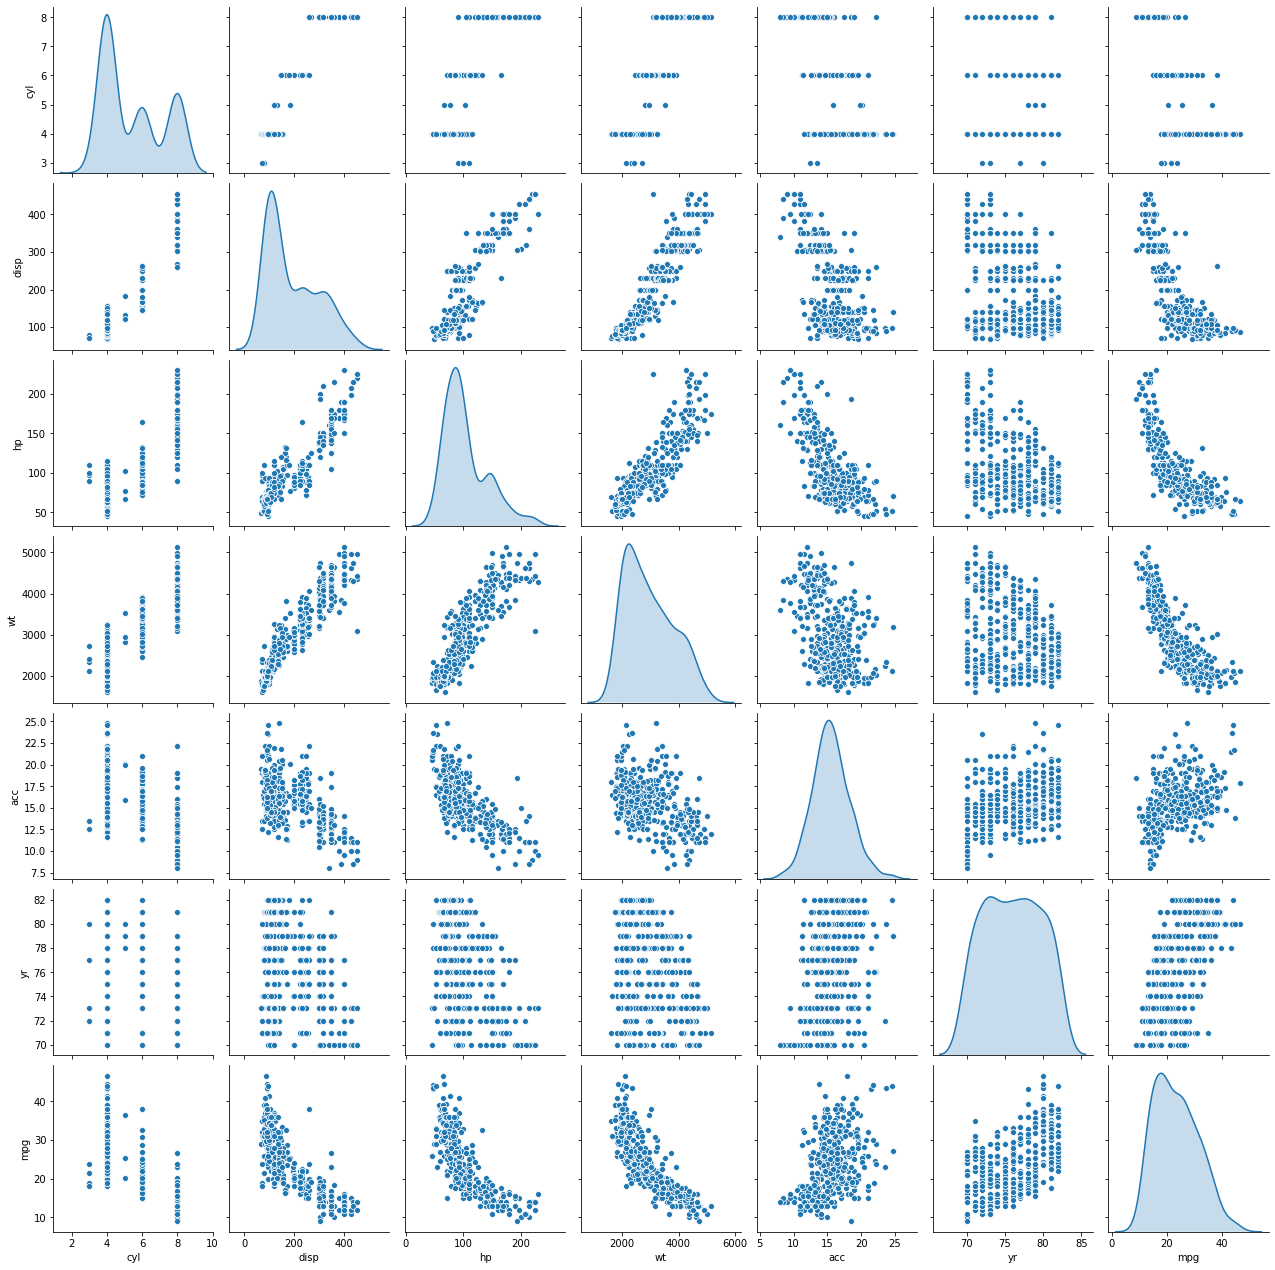

In [199]:
sns.pairplot(car, diag_kind= 'kde')

* 3 clear distinct peaks are observed in the 'cyl' column.

* 'Disp' also shows 3 peaks, with one peak more dominant while other are feint.

* 'Acc' has a near perfect Normal Distribution.

* correlation is observed between 'disp' , 'wt' and 'mpg'.

In [200]:
car = car.drop('yr', axis=1)

# K Means Clustering

In [201]:
from sklearn.preprocessing import StandardScaler

In [202]:
# The data must be standardized prior to the model fitting. 

ss = StandardScaler()
dt = ss.fit_transform(car)
car_scale  = pd.DataFrame(data = dt, columns= car.columns)

In [203]:
from sklearn.cluster import KMeans

* Evaluating the Number of clusters that could be obtained

In [344]:
cl = range(1,7)
clu_errors = []
for c in cl:
    km = KMeans(n_clusters= c, random_state=10)
    km.fit(car_scale)
    clu_errors.append(km.inertia_)
    
cluster = pd.DataFrame({ 'Error': clu_errors, 'num_cluster' : cl})


         Error  num_cluster
0  2664.693467            1
1  1010.258138            2
2   610.514241            3
3   500.132887            4
4   434.126001            5
5   379.229425            6


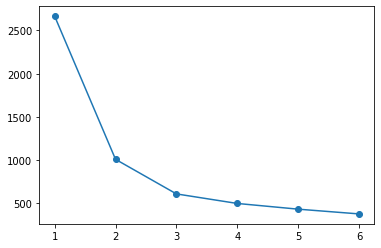

In [345]:
print(cluster)
plt.plot(cluster.num_cluster, cluster.Error,marker = "o")

* from the elbow plot, we see the bend at 3 clusters. 

In [346]:
km = KMeans(n_clusters=2, random_state=10)
km.fit(car_scale)
prediction = km.predict(car_scale)
car_scale['Group'] = prediction

In [347]:
car_scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cyl     398 non-null    float64
 1   disp    398 non-null    float64
 2   hp      398 non-null    float64
 3   wt      398 non-null    float64
 4   acc     398 non-null    float64
 5   mpg     398 non-null    float64
 6   Group   398 non-null    int32  
dtypes: float64(6), int32(1)
memory usage: 20.3 KB


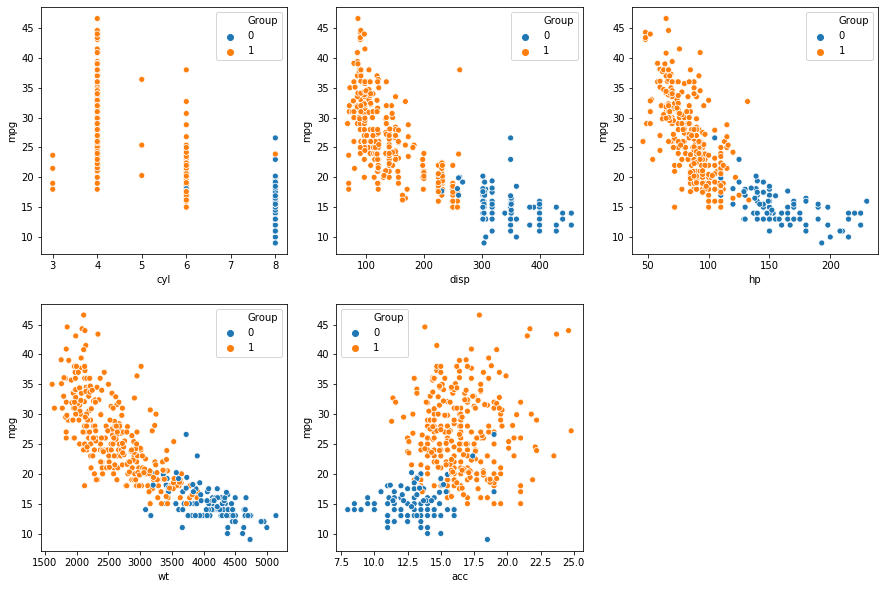

In [348]:
cols = ['cyl', 'disp', 'hp', 'wt', 'acc', 'yr']
plt.figure(figsize = (15,10) )
for i in range(1,len(cols)):
    
    plt.subplot(2,3, i)
    sns.scatterplot(data= car, x= cols[i-1], y ='mpg', hue = car_scale['Group'])

In every attribute the 3 clusters distinguish themselves.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016EC9CF8208>,
      dtype=object)

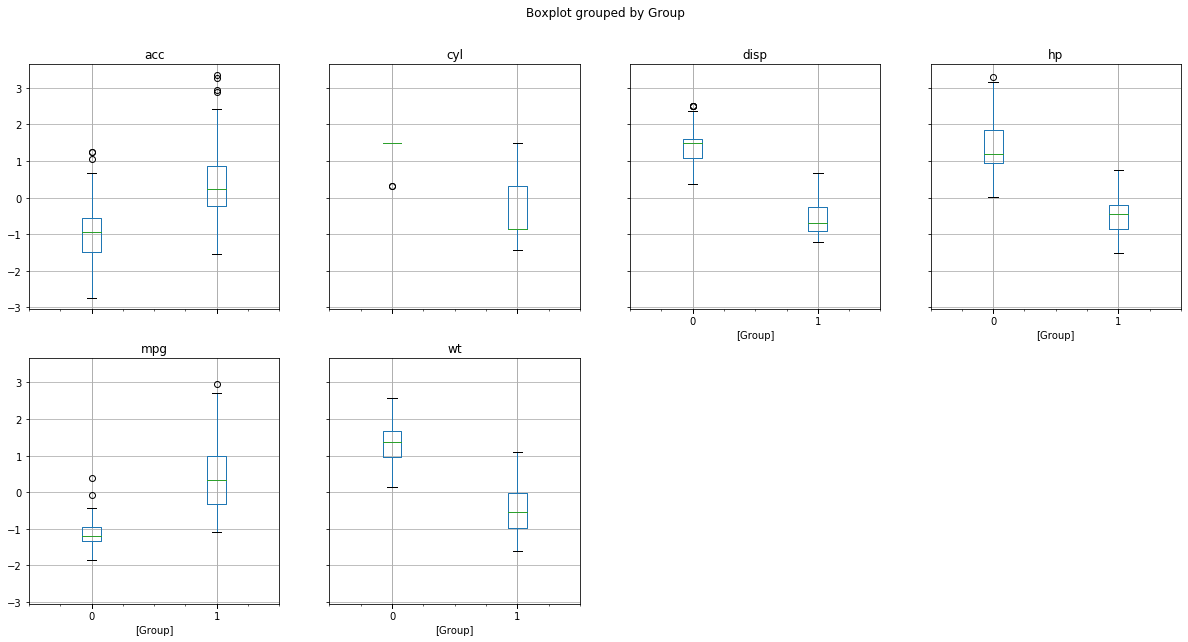

In [349]:
# The Box plot to visualize the distribution on each group.
car_scale.boxplot(by= 'Group', layout= (2,4), figsize=(20,10))

* Outliers are observed in the clusters, more the outliers determines that the cluster are stretched.

In [350]:
car_scale.groupby('Group').count()

,cyl,disp,hp,wt,acc,mpg
Group,,,,,,
0,104,104,104,104,104,104
1,294,294,294,294,294,294


* The cluster formed but Kmeans has one big  cluster and tow identical small clusters which are about half the size of the larger one.

* The cluster formed should be in similar sizes. so this would be a bad cluster formation.

# Agglomerative Clustering

In [248]:
from sklearn.cluster import AgglomerativeClustering

In [249]:
ag = AgglomerativeClustering(n_clusters=3, affinity = 'l2', linkage='average')
ag.fit(car)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3)

In [255]:
car['Group'] = ag.labels_
car2 = car.groupby('Group').head(398)

In [256]:
from scipy.cluster.hierarchy import dendrogram, linkage

Observing the dendograms obtained by various Linkage Methods.

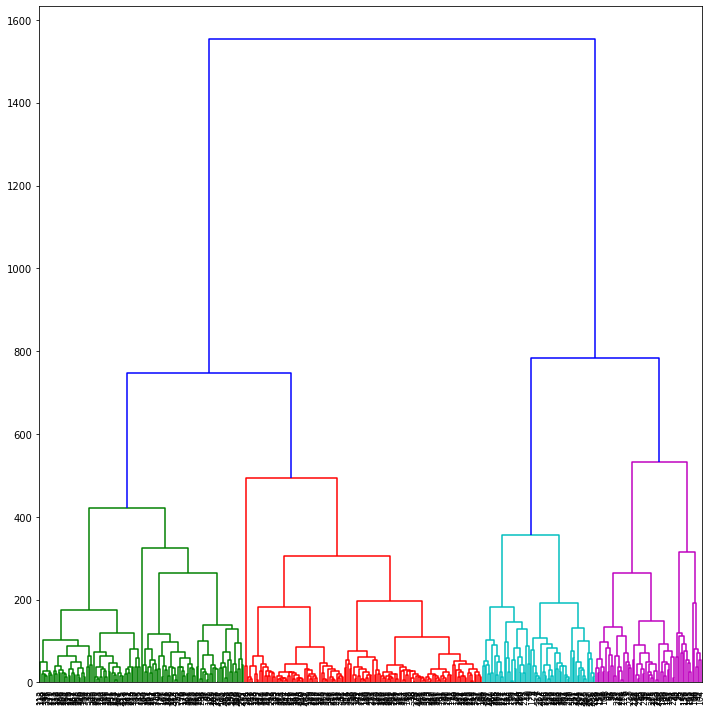

In [257]:
link = linkage(car2, 'average' )
plt.figure(figsize=(10, 10))
dendrogram(link, leaf_rotation=90.,color_threshold = 650, leaf_font_size=8. )
plt.tight_layout()

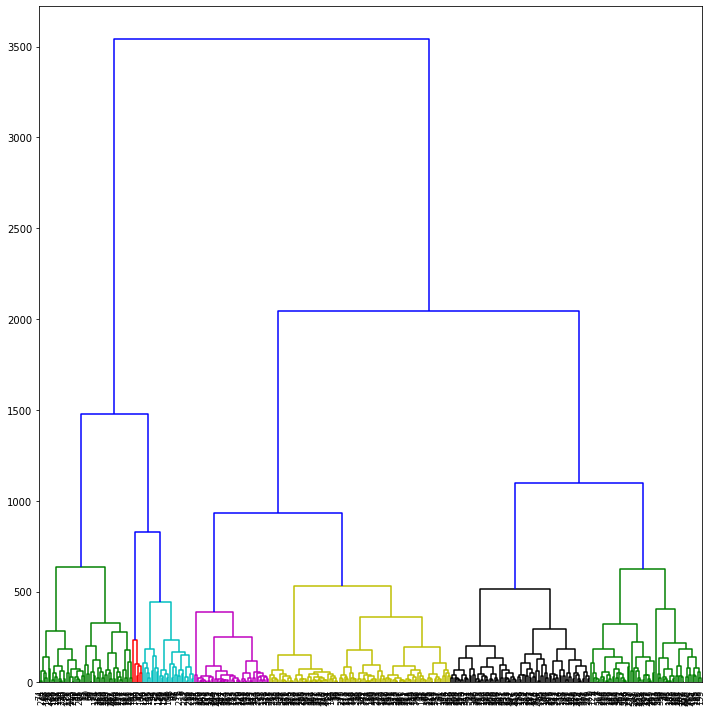

In [258]:
link = linkage(car2, 'complete' )
plt.figure(figsize=(10, 10))
dendrogram(link, leaf_rotation=90.,color_threshold = 650, leaf_font_size=8. )
plt.tight_layout()

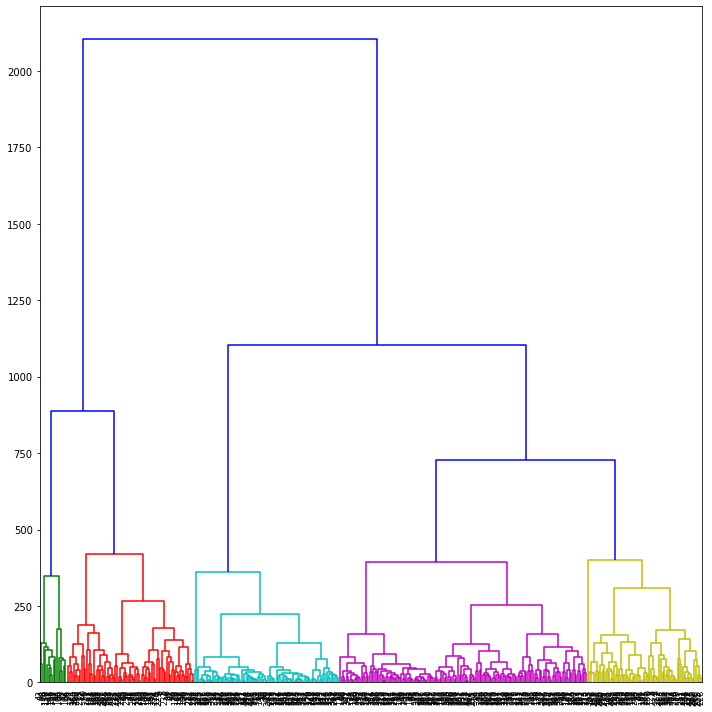

In [259]:
link = linkage(car2, 'weighted' )
plt.figure(figsize=(10, 10))
dendrogram(link, leaf_rotation=90.,color_threshold = 650, leaf_font_size=8. )
plt.tight_layout()

In [304]:
ag = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage='complete')
ag.fit(car)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=3)

In [305]:
car['Group'] = ag.labels_
car2 = car.groupby('Group').head(398)

In [306]:
car2.groupby('Group').count()

,cyl,disp,hp,wt,acc,mpg
Group,,,,,,
0,93,93,93,93,93,93
1,151,151,151,151,151,151
2,154,154,154,154,154,154


* The Complete Linkage method is most suitable for 3 clusters. 

In [337]:
car2

,cyl,disp,hp,wt,acc,mpg,Group
0,8,307.0,130,3504,12.0,18.0,1
1,8,350.0,165,3693,11.5,15.0,0
2,8,318.0,150,3436,11.0,18.0,1
3,8,304.0,150,3433,12.0,16.0,1
4,8,302.0,140,3449,10.5,17.0,1
...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,27.0,1
394,4,97.0,52,2130,24.6,44.0,2
395,4,135.0,84,2295,11.6,32.0,2
396,4,120.0,79,2625,18.6,28.0,1


In [338]:
car_df = car.copy()

In [340]:
car_1 = car_df[car_df['Group']==0]
car_2 = car_df[car_df['Group']==1]
car_3 = car_df[car_df['Group']==2]

In [353]:
X_1 = car_1.drop(['Group', 'mpg'], axis=1)
X_2 = car_2.drop(['Group', 'mpg'], axis=1)
X_3 = car_3.drop(['Group', 'mpg'], axis=1)

In [355]:
X_2.head(10)

,cyl,disp,hp,wt,acc
0,8,307.0,130,3504,12.0
2,8,318.0,150,3436,11.0
3,8,304.0,150,3433,12.0
4,8,302.0,140,3449,10.5
10,8,383.0,170,3563,10.0
11,8,340.0,160,3609,8.0
13,8,455.0,225,3086,10.0
15,6,198.0,95,2833,15.5
16,6,199.0,97,2774,15.5
17,6,200.0,85,2587,16.0


In [357]:
y_2.head(10)

0    -0.706439
2    -0.706439
3    -0.962647
4    -0.834543
10   -1.090751
11   -1.218855
13   -1.218855
15   -0.194023
16   -0.706439
17   -0.322127
Name: mpg, dtype: float64

In [327]:

car_df = car.copy()

car_1 = car_df[car_df['Group']==0]
car_2 = car_df[car_df['Group']==1]
car_3 = car_df[car_df['Group']==2]

ss1= StandardScaler()
ss3= StandardScaler()
ss2= StandardScaler()


X_1 = car_1.drop(['Group', 'mpg'], axis=1)
X_2 = car_2.drop(['Group', 'mpg'], axis=1)
X_3 = car_3.drop(['Group', 'mpg'], axis=1)

X_1 = ss.fit_transform(X_1)
X_2 = ss.fit_transform(X_2)
X_3 = ss.fit_transform(X_3)

y_1 = car_1['mpg']
y_2 = car_2['mpg']
y_3 = car_3['mpg']

print(car_1.shape)
print(car_2.shape)
print(car_3.shape)

(93, 7)
(151, 7)
(154, 7)


> Building Linear Regression models on individual Clusters

In [358]:
from sklearn.linear_model import LinearRegression

In [359]:
lr_Model_1 = LinearRegression()
lr_Model_2 = LinearRegression()
lr_Model_3 = LinearRegression()

In [360]:
from sklearn.model_selection import train_test_split

In [361]:
Xtrain_1, Xtest_1, ytrain_1, ytest_1 = train_test_split(X_1, y_1, test_size =0.3, random_state=10)
Xtrain_2, Xtest_2, ytrain_2, ytest_2 = train_test_split(X_2, y_2, test_size =0.3, random_state=10)
Xtrain_3, Xtest_3, ytrain_3, ytest_3 = train_test_split(X_3, y_3, test_size =0.3, random_state=10)

In [362]:
lr_Model_1.fit(Xtrain_1, ytrain_1)
lr_Model_1.score(Xtest_1, ytest_1)

0.17027291272649925

In [363]:
lr_Model_2.fit(Xtrain_2, ytrain_2)
lr_Model_2.score(Xtest_2, ytest_2)

0.14493865672359363

In [364]:
lr_Model_3.fit(Xtrain_3, ytrain_3)
lr_Model_3.score(Xtest_3, ytest_3)

-0.30944686585302117